# 선형 분류 이론 및 실습

 ## 로지스틱 회귀란 무엇인가



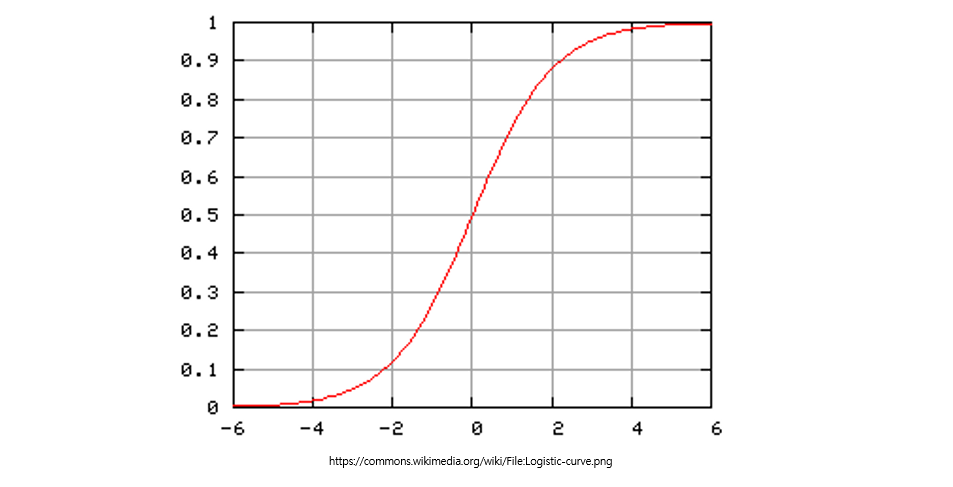

* 로지스틱 회귀

  1. 로지스틱 회귀란 샘플이 특정 클래스에 속할 확률을 추정하는 것, ex)특정 이메일이 스팸일 확률
  2. binary한 문제일 경우, 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 할 수 있음(이진 분류기)

* 확률을 추정하는 법

  1. 선형 회귀 모델과 같이 로지스틱 회귀 모델도 마찬가지로 입력 변수의 가중치 합을 계산한다.
  2. 대신 선형회귀와 같이 결과물을 연속적인 형태로 출력하는 것이 아니라, 0~1사이의 확률 값을 출력한다.

* 로지스틱 함수

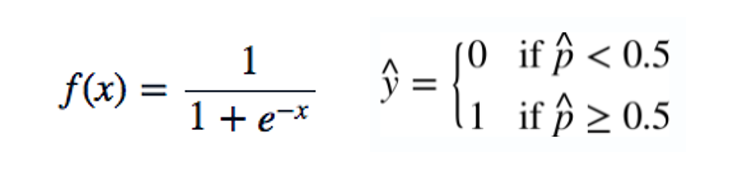

- f(x)값의 산출물인 p(probability)< 0.5 인 경우, y = 0
- f(x)값의 산출물인 p(probability)>= 0.5 인 경우, y = 1
- 반드시 0.5는 아님 목적에 따라 변경 가능함

## 로지스틱 회귀 모델의 훈련과 비용함수
* 로지스틱 회귀 모델의 훈련 목적은 positive(y=1)에 대한 샘플에 대해서는 높은 확률로 추정토록 하고, negative(y=0)에 대한 샘플에 대해서는 낮은 확률로 추정하게 하는 모델 최적의 가중치를 찾는 것입니다.

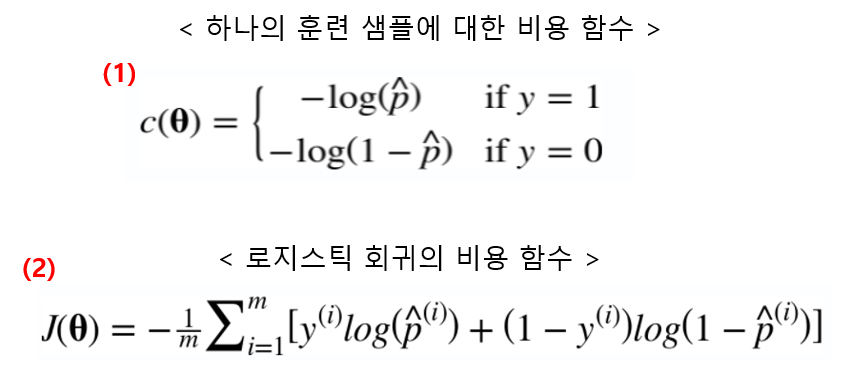

* (1) 비용함수는 p가 0에 가까워지면 질수록 -log값이 매우 커지고, 1에 가까워지면 질수록 0에 가까워지게 된다.
* 그래서 (1)의 경우 positive한 샘플에 대해서는 최대한 p를 1에 가깝게 만들고, negative한 샘플에 대해서는 최대한 p를 0에 가깝게 만들어야 한다.
* (2) 전체 훈련 세트에 대한 비용 함수는 (1)방식을 차용한 방식으로 모든 훈련 샘플의 비용에 평균을 한 것이다. => 이를 로그 손실이라 부른다.
* (2)의 비용 함수는 볼록 함수이므로 경사 하강법 혹은 다른 최적화 알고리즘을 통해서 전역 최소값을 찾을 수 있다.
* 그래서 만약 경사하강법을 사용하여서 모델을 최적화시킨다면 비용함수를 편미분하여서 얻어낸 그래디언트값을 통해서 가중치를 최신화 시킬 수 있다.



# 결정 경계
* 로지스틱 회귀를 더욱 이해하기 쉽게 설명하기 위해서 붗꽃 데이터 사용
* 이 데이터는 세 개의 품종 (Setosa, Versicolor, Virginica), 150개의 데이터 수, Petal(꽃잎) Sepal(꽃받침)의 너비와 길이를 가진다.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris() 
print(list(iris.keys()))  
 

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
x = iris['data'][:,3:]  
y = (iris['target']==2).astype('int') 

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)  

LogisticRegression()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_new = np.linspace(0,3,1000).reshape(-1,1)  
 
y_proba = log_reg.predict_proba(x_new)  
y_proba 
 

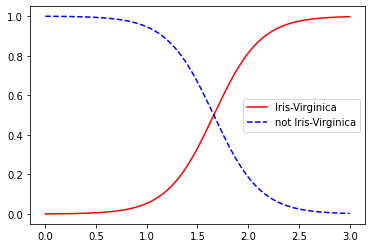

In [ ]:
plt.plot(x_new, y_proba[:,1], "r-", label = "Iris-Virginica")
plt.plot(x_new, y_proba[:,0], "b--", label = "not Iris-Virginica")
plt.legend()
plt.show()

# 소프트맥스 회귀
* 결과값이 binary 한 것이 아닌  categorical값 일때 처리하는 방법

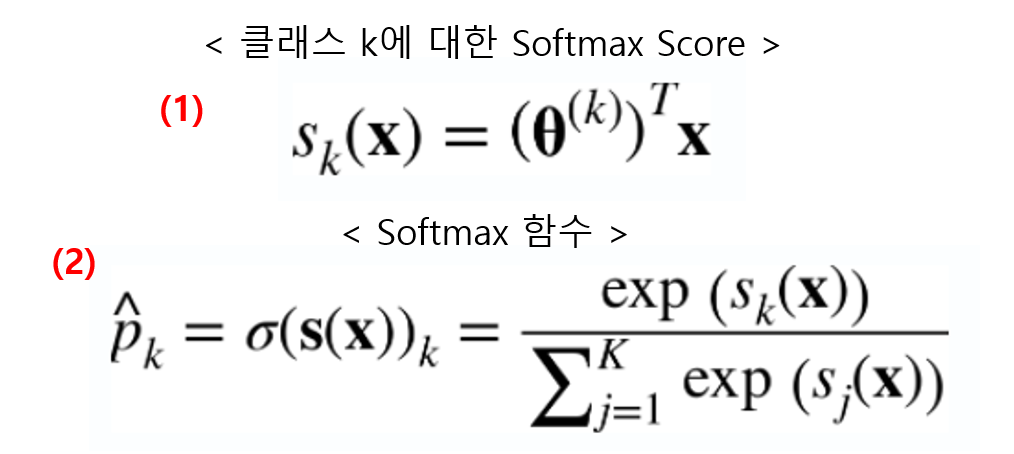


* 로지스틱 회귀 모델은 이진 분류뿐만 아니라, 여러 클래스를 분류할 수도 있다.
* 이를 지원하는 것이 Softmax Regression(소프트맥스 회귀) 또는 다항 로지스틱 회귀라고 한다.
* (1)의 식은 각 클래스 별 softmax에 대한 점수이다.
* (2)은 각 클래스 점수를 exponential의 sum으로 나눈 것으로 정의 된다.

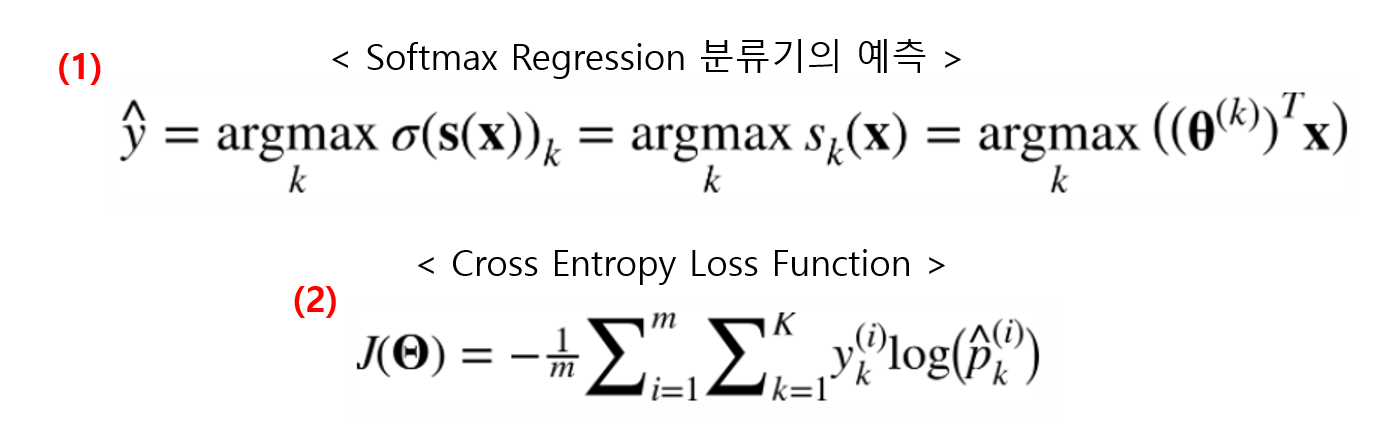

- (1)에서 처럼 softmax를 통해서 나온 각 클래스별 추정 확률 값이 가장 높은 클래스를 실제 클래스라고 예측한다.
- 모델의 훈련 방법은 로지스틱 회귀의 훈련 방식과 비슷하게 (2)과 같이 나타나게 되고, 이를 크로스 엔트로피라고 부른다.
- 크로스엔트로피는 추정된 클래스의 확률이 목표 클래스에 얼마나 잘 들어맞는지 판단하는 용도로 종종 사용된다.